# Encoding, Scaling, and SVM (Oh My!)

Quick Poll: [https://pollev.com/bgriebel](https://pollev.com/bgriebel)

## Encoding

As we have discussed previously, and seen on the midterm, in order to use categorical data in ML models, we need to find a way to convert it to something that can be interpreted by our models. There are two main ways of doing this, One-hot encoding, and Ordinal Encoding. 

### One-Hot Encoding 

Converts the categorical data with n potential values, into n new features. Each new feature represents a single possible value of the categorical data, and has a value 1 where the categorical data is that value, and 0 everywhere else. 

Here is a quick example, what if we had categorical data representing peoples favorite flavors of ice cream:

| Categorical Feature |=>|Chocolate | Vanilla| Strawberry|
|---------------------|--|:-------:|:----:|:---:|
| Chocolate |=>| 1|0|0|
|Vanilla|=>|0|1|0|
|Chocolate|=>|1|0|0|
|Strawberry|=>|0|0|1|
|Vanilla|=>|0|1|0|
|Vanilla|=>|0|1|0|
|Chocolate|=>|1|0|0|
|Strawberry|=>|0|0|1|

An important feature of one-hot encoding is that the resulting features don't say anything about the ordering of data, this makes one-hot encoding good for **nominal data**, where there is no meaningful ordering (such as colors, flavors, or animal species).   

### Ordinal Encoding

This converts the categorical data with n potential values, into integers (normally between 0 and n-1). Each value of the new feature represents one of the values from the categorical data. 

| Categorical Feature | Encoded Feature |
|:--------------------|----------------:|
| Monday | 1|
| Wednesday | 3 |
| Friday | 5|
| Tuesday| 2|
| Monday |1|
| Thursday |4|
| Friday|5|
|Tuesday|2|
|Thursday| 4|

The feature resulting from ordinal encoding are ordered, this is useful if the data is **ordinal**, with some meaningful ordering (such as days of the week, months, or education level). In addition to preserving order, it can also preserve some sense of distance (such as Tuesday being closer to Monday, than to Friday). 

### Interesting Applications

_Note: This is just something I thought you might find interesting, you can skip this part if you want._

Encoding is a fundamental part of all modern machine learning, even when we do have continous variables they are essentially encoding some real world quantity in a way that a computer can ingest that information. One really interesting application of encoding is in natural language processing, where we are able to convert human language into something that a computer can understand. This enables things like large language models (chatGPT, Bard, Lllama, Orca), where computers can both understand and then generate human readable text.  

To do this, you have a model which learns how to translate text into a vector, by learning on a huge amount of text written by people (called a corpus). Two significant methods are Byte pair encoding, and word2vec (there are a huge number of ways to do this, these are not neccesarily the most important, but just two I found interesting). 

**Byte pair encoding**: This is what is used in GPT models. It starts with the "alphabet" of its corpus, i.e. all the single characters found in the corpus. This is the initial set of "tokens" it has to encode text (where token means the small groups it will break text down into). Then, it iteratively adds new tokens to this alphabet, by adding a token representing the most common pair of tokens from the previous iteration. From this it learns merging rules, where it can group letters and even words into tokens. More information can be found [here](https://huggingface.co/learn/nlp-course/chapter6/5?fw=pt).

**Word2vec**: Word2vec translates words into vectors, such that the cosine simmilarity between the vectors, represents **semantic** simmilarity between the words (simmilarity in what the words mean. It can do this because it examines the probability of context words (the words surrounding a given word), and translates words to vectors in such a way that words that are found in simmilar contexts are located close together. More about this method can be found [here](https://www.tensorflow.org/text/tutorials/word2vec). This method has also been applied to biological sequences where it allows conversion of DNA, RNA, and protein sequences into vectors which can be used in machine learning models. 

## Scaling

When inputing data into a machine learning algorithm, scaling that data can help with interpretability, and also with algorithm accuracy and stability. 

### Interpretation

In linear regression, after fitting the model we may want to evaluate how important are all of the different features. We can look at the coefficients of the different features, but if the data isn't scaled this won't tell us much. What if one of the coefficients is small, just because the feature its associated with takes on very large values?  

Imagine trying to predict 

### Accuracy and Stability

In KNN classification, we calculate the distance between the data point we are trying to classify, and our labeled data. When we do this, if we haven't scaled our data, one of the features may completely dominate the distance function. For example, what if you were trying to predict life expectancy, and one of the features was income, and one was whether or not the person smoked. If we didn't scale this data, since income takes on much larger values than the encoded smoking value, it will dominate the distance function, and so you will essentially ignore the smoking, even if that could significantly impact the results.  

Further, when your data isn't scaled, outliers in one of your features can has enormous effects on the result. If one of your features can take on very large values occasionally, then small changes in which data points are included in your training and testing sets can have huge effects on the accuracy of your model. For example, take a set of data, where a single feature has one value that is 100,000 but every other feature, and value is between 0 and 1. If this sample is randomly assigned to the test set, then the model will have coefficients on that same scale, and when testing against the test set, this huge value will cause the model to predict something non-sensical.   

Though this is an extreme example, it shows how unscaled data can cause problems with stability (meaning that small changes in your method, such as changing the test-train split proportion, can cause large changes in your predictions). 

|feature 1|feature 2| feature 3| feature 4|
|---------|---------|----------|----------|
|0.5|0.9|0.1|0.9|
|0.2|0.8|0.2|0.5|
|0.3|0.8|0.3|0.1|
|0.1|0.7|0.4|0.2|
|0.9|100000|0.4|0.4|
|0.4|0.1|0.3|0.7|
|0.5|0.8|0.2|0.6|
|0.6|0.3|0.5|0.2|
|0.7|0.4|0.6|0.4|
|0.8|0.2|0.2|0.6|

### Min-Max Scaler

This is a scaler that converts every value so that it lies between 0 and 1. To do this, first the `max` and `min` are found, and then each value is encoded by $encoded = \frac{value-min}{max-min}$, essentially converting the min to 0, the max to 1, and then scaling all the other numbers to lie in this range.   

*Note:* This method will transform negative values into positive ones, which could cause problems depending on exactly what the negative values mean. If the negative values are velocities for example, it doesn't make sense to use a Min-Max scaler, since the negative values can actually mean a different direction than positive values, something you comletely loose with the min-max scaler. You could instead use the `MaxAbsScaler`, which would instead scale to between -1, and 1 preserving negative values.   

### Robust Scaler

This method is very simmilar to the Min-Max scaler, but instead of using minimum and maximum, it uses the first and third quartiles. If $Q_1$ is the first quartile, and $Q_3$ is the third, then the encoded values are $encoded = \frac{value - Q_1}{Q_3-Q_1}$, or if you select `with_centering=True` (the default in sklearn) $encoded = \frac{value - median}{Q_3-Q_1}$. The robust scaler is better at dealing with **outliers** than the Min-Max scaler is. 

*Reminder:* The first quartile is the value such that 25% of the data is less than it, and the third quartile is the value that 75% of the data is less than. They can also be found by first splitting the data at the median, and finding the medians of these two subgroups.  

### Standard Scaler

The standard scaler first finds the `mean` and `standard_deviation` of the data, and the each value is encoded by $encoded = \frac{value-mean}{standard\_deviation}$. If the data is distributed according to a normal distribution this scales it to become the standard normal (which is where the name comes from). This doesn't scale the data to a specific range, but rather sets the mean of the encoded data to be 0, and the standard deviation to be 1. 

### When to use Which scaler

**Standard Scaler**: Works best when the data is more normally distributed. It can be sensitive to outliers, since those will impact the mean and standard deviation. 

**Min-Max Scaler**: Works best when the data is bounded (i.e. you know it will always be between some min and some max). It is also sensitive to outliers, so if your data has outliers, you either need to remove them or use a robust scaler (which you do dependends on the cause of the outlier). An example of data frequently used with this scaler is RGB pixel values in image processing, since they are all (normally) between 0 and 255. Additionally, this will leave one-hot encoded values unchanged (which is what you normally want), whereas the standard scaler will change them. 

**Robust Scaler**: As mentioned above, works very simmilarly to the Min-Max scaler, but is more robust to outliers. 

Ultimately, there aren't really hard and fast rules about when to use what, it really depends on the characteristics of your data, and the model you're going to implement. Also, normally you will want to scale all your features using the same method, since if you scale different features with different methods you end up loosing much of the advantage of scaling. 

### Other Scaling Methods

There are a huge variety of scaling methods that make sense to use in different circumstances.

[Here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-robust-scaler-section) is a comparison of different scaling methods on data with outliers 

[Here](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler) is sklearn's user guide about scaling (and some about encoding as well)



## Support Vector Machines

Support vector machines are a supervised machine learning technique for performing classification. They do this by finding ways of drawing "lines" (hyperplanes) between groups of data. Using the kernel trick, this method can even learn non-linear decision boundaries.  

For linear SVM, the method tries to find a hyperplane which seperates the two groups, and which maximizes the "margins"

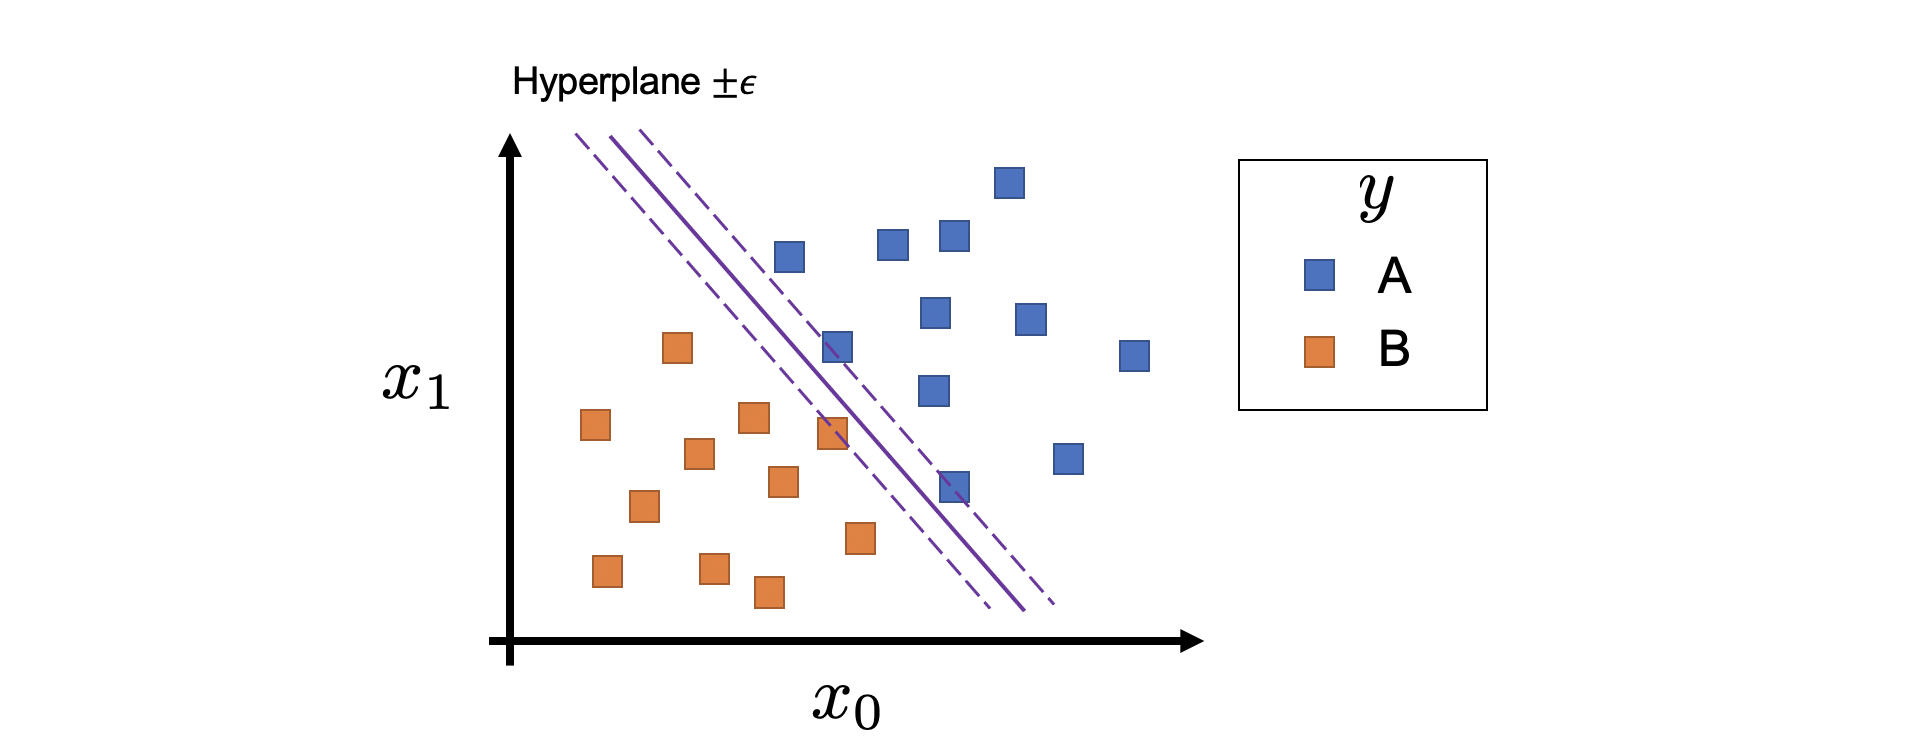

This method can also be used in cases where you either can't get a seperation using a hyperplane, or where outliers cause problems by making use of **soft margin** classification. 

In linear SVM, outliers can significantly influence the selected hyperplane, and degrade model performance
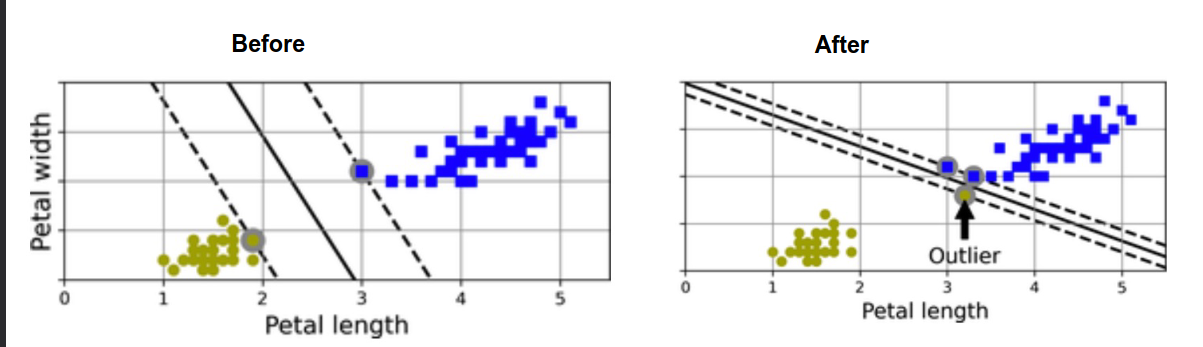

To combat this, we can make use of a **soft margin**, that is we allow some points to violate the margin. However, we stop the model from allowing too many of these by specifying that the sum of the error distances (the distances of points on the wrong side of the margin to the margin) must be less than some hyperparameter C.  

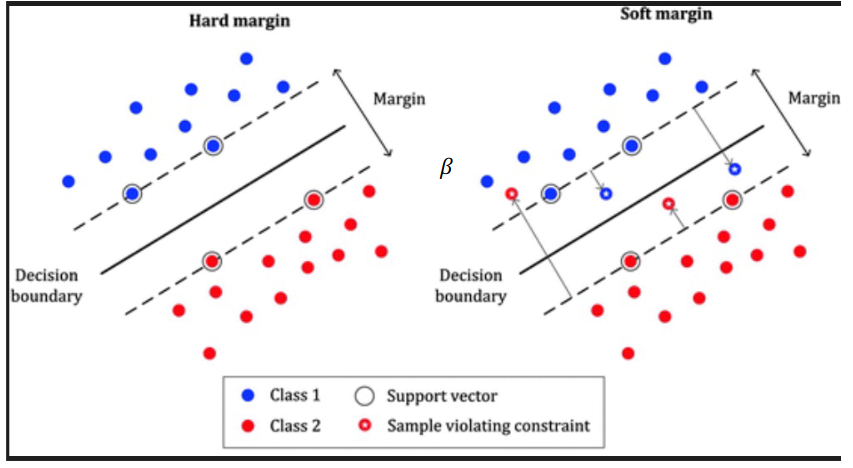

But what about when there is no hyperplane that can seperate the groups? (no straight line in 2D space)

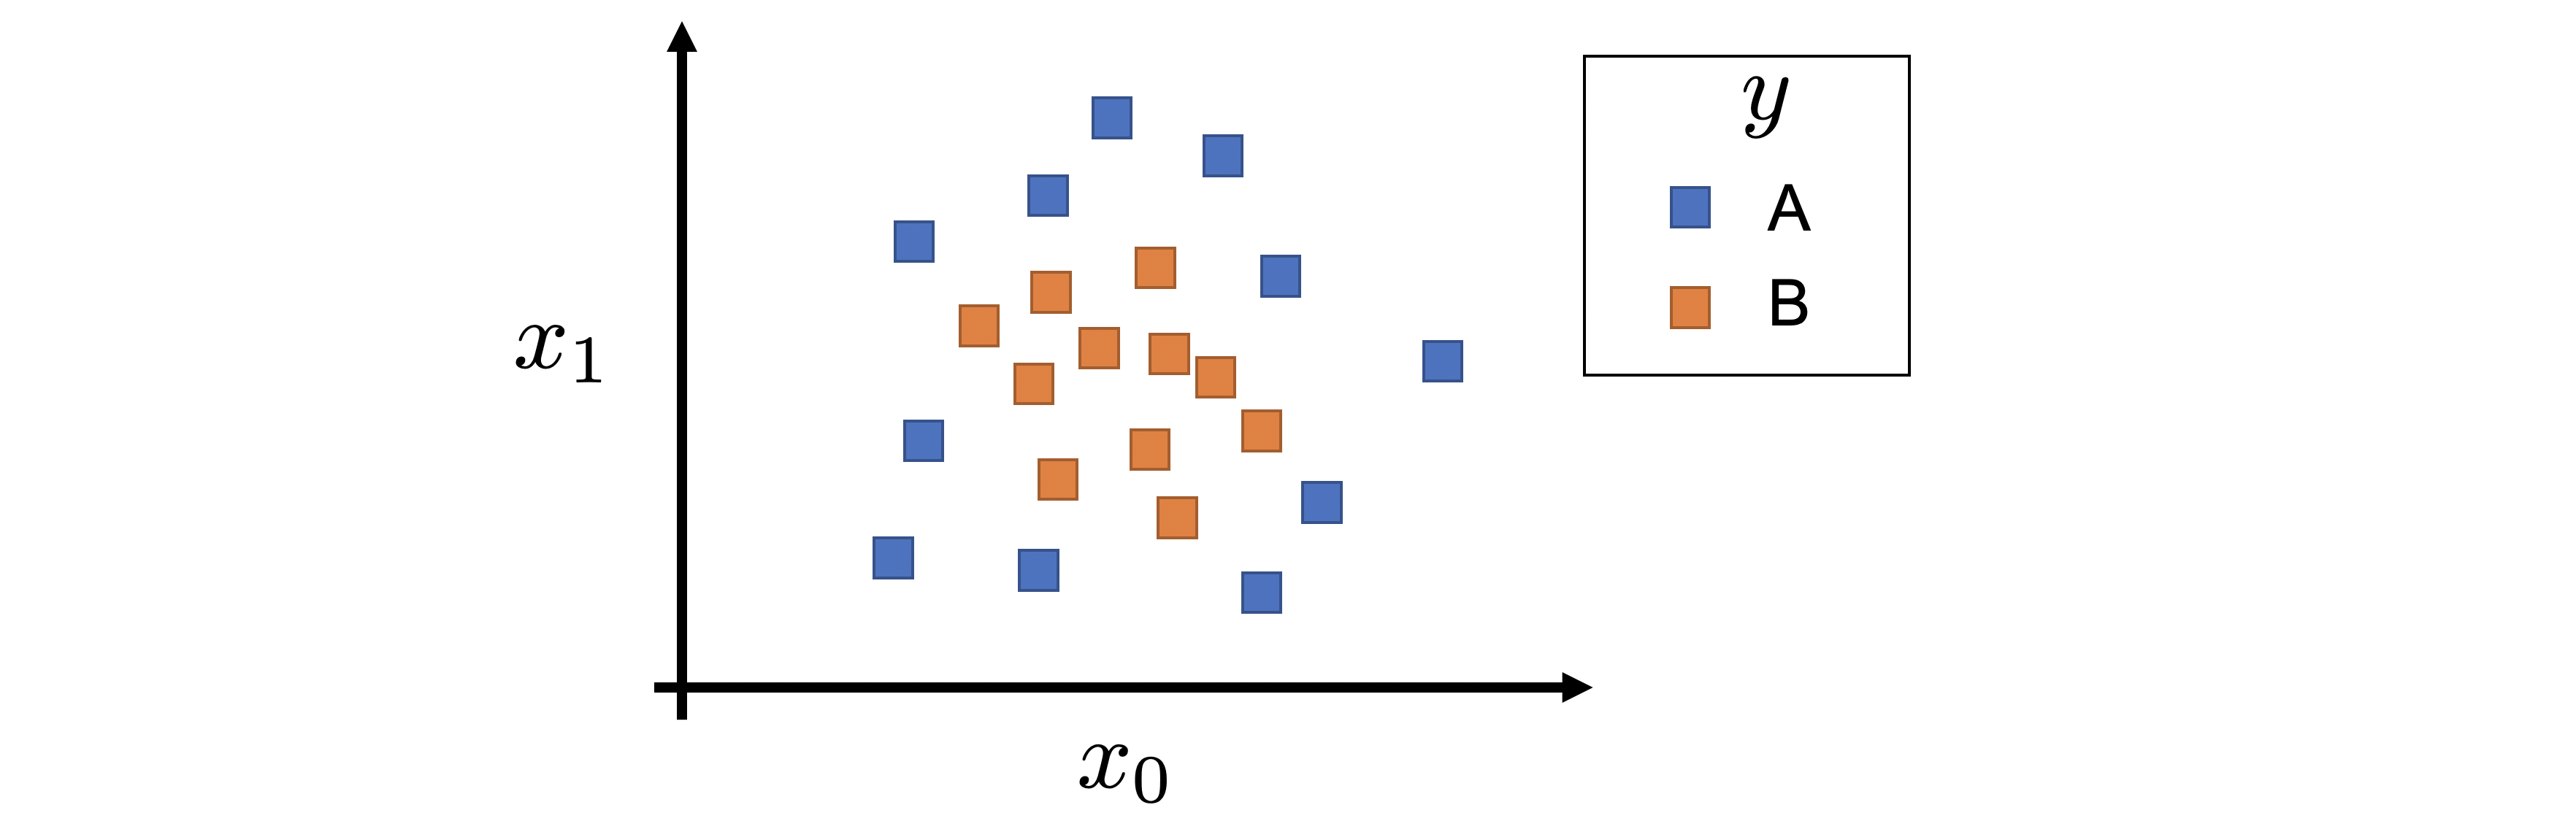

We can project the data into a higher dimensional space, such that there is a linear seperation between the two groups!

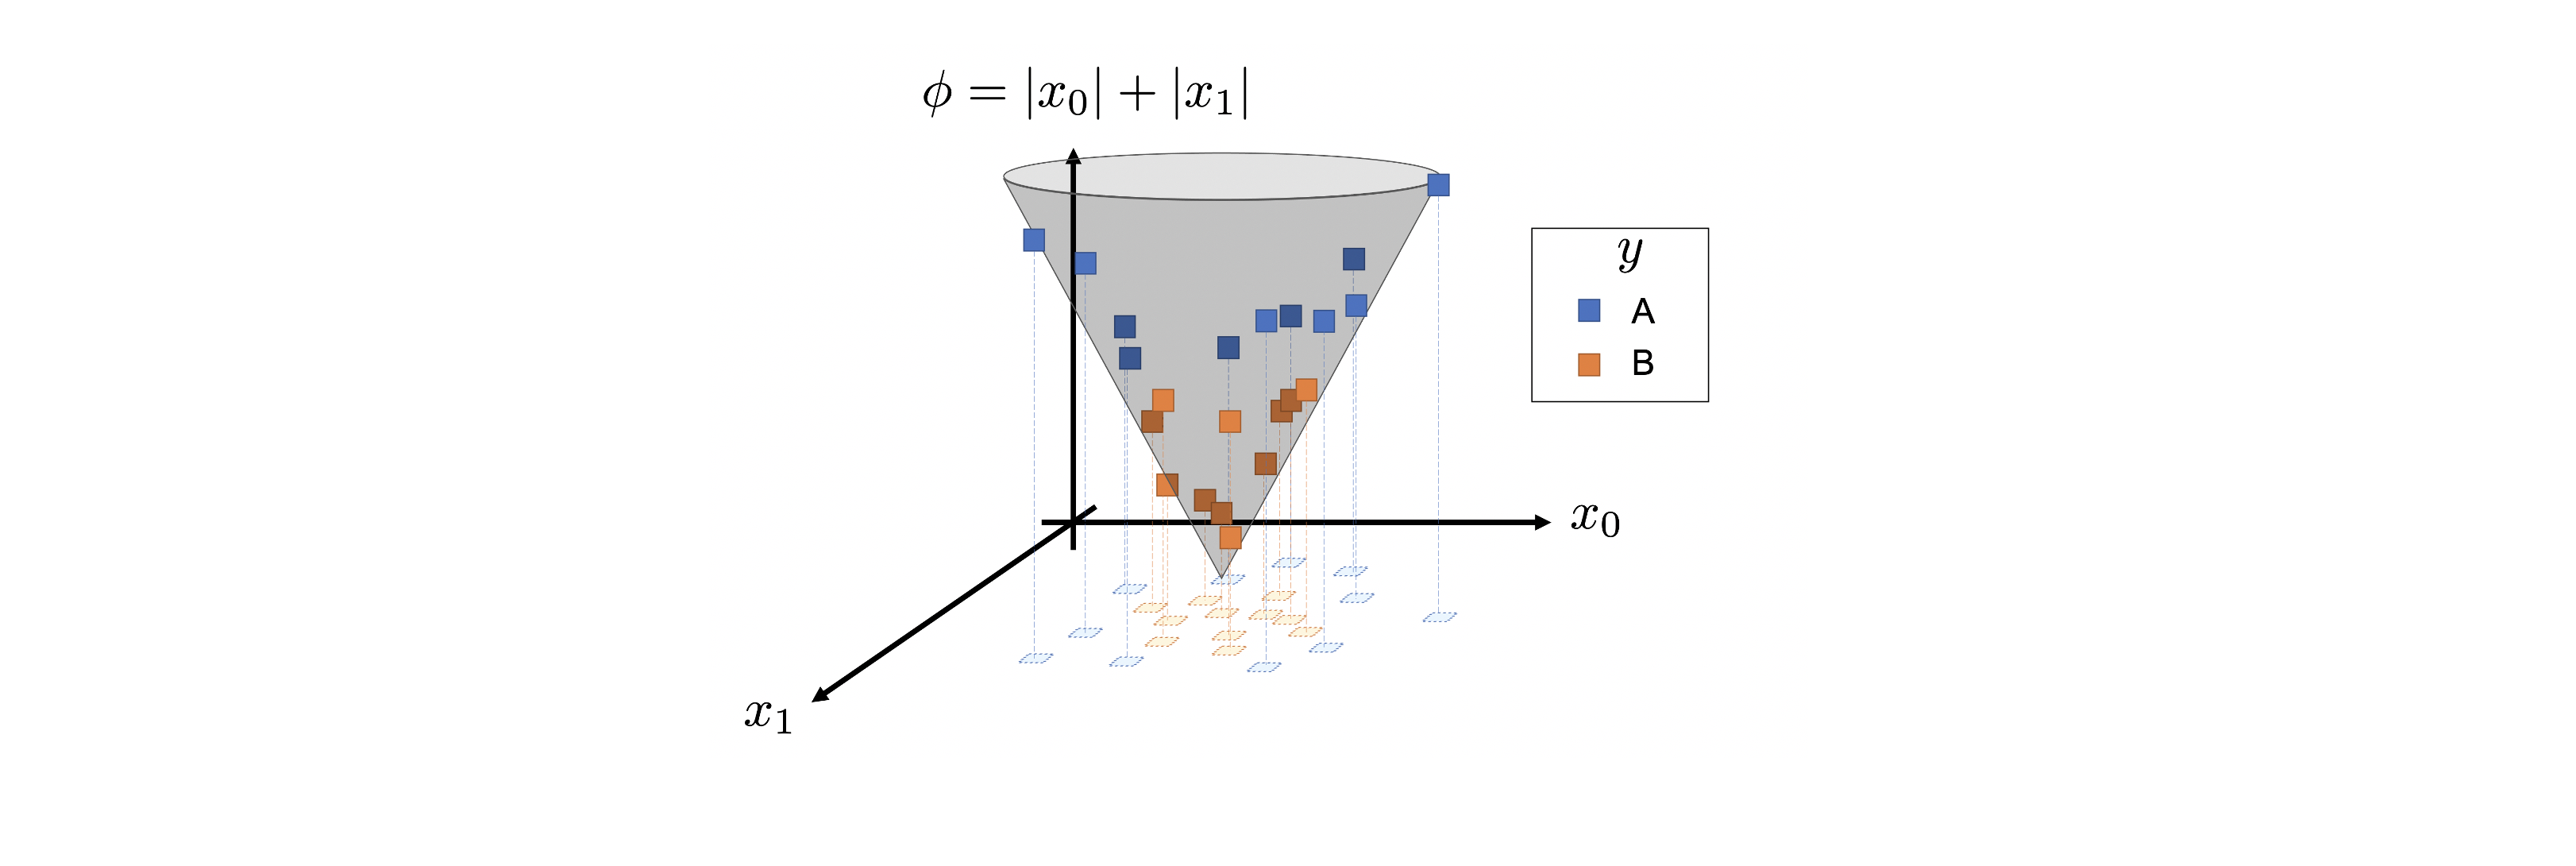

After we apply the function, $\Phi(X)\in\mathbb{R}^2\rightarrow\mathbb{R}^3$, __we can easily draw a linear plane to differentiate the classes in three dimensions__.

Great! But calculating this transformation is expensive, and we have to make a specific choice about $\Phi$.

This is where the **Kernel Trick** comes in: The kernel trick allows us to make use of a kernel function to do all the neccesary calculations in this higher dimensional space **WITHOUT ACTUALLY PROJECTING OUR DATA**. 

But what the heck is the kernel trick!?

The kernel trick uses a kernel function, which represents an inner product (generalized dot product) of the higher dimensional space. This function takes in two vectors in the lower dimensional space, and computes the inner product of the vectors in the higher dimensional space, **without** mapping them into that space.   

It turns out, the inner product is all you really need to find the hyperplane, since it allows you to find "distance" in the higher dimensional space.

## Excercises

### Encoding:
Decide what type of encoding would be best with these categorical data types:
1. City names
2. Nationality 
3. Letter Grades
4. Socioeconmic group (low, middle, high)
5. Eye Color

What happens with one-hot and ordinal encoding when you have a binary feature (a feature that only takes on two values)?

### Scaling

Below I load a new dataset (the wine dataset, see [https://archive.ics.uci.edu/dataset/109/wine](https://archive.ics.uci.edu/dataset/109/wine) for more information). Look at the distributions of the features (using data visualizations), and decide which type of scaler to use, then apply it. 

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn.datasets import load_wine, load_iris
X,y = load_wine(return_X_y=True, as_frame=True)
print("The feature dataframe:\n")
X

The feature dataframe:



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [2]:
# Visualize the data distributions

In [3]:
# Apply an appropriate scaler

### Support vector machines

Below I load the iris dataset. Using data visualization, determine which pairs of features, if used with a linear SVM classifier, would be worst at differentiating species 2 from the other species. 

In [4]:
X,y = load_iris(return_X_y=True, as_frame=True)

Are there any species that could be classified, using only two features, with a hard margin classifier?

Transform the y vector (a pd.Series), such that it has 1 everywhere the species is 2, and 0 everywhere else. 

Split your data into a test set and a training set, then train an SVM classifier for classifying if an iris is species 2,  or not, with `kernel="linear"`. Try using different values of C and see how it affects the accuracy of the classification. Documentation for sklearn SVC (support vector classifier) is [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

### Challenge

Create a pipline using sklearn (more info [here](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) and [here](https://scikit-learn.org/stable/modules/compose.html#pipeline)), that includes scaling, principal component analysis (more info [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) and fitting an SVM. Use cross validation with this pipeline to try different scaling methods, different `n_components` for PCA, and different SVM hyperparameters, and determine which set of hyperparameters/methods is best. 